# **Construindo uma `RNA` para classificação de _raio-x_ com pneumonia** 
---

Nesse projeto, iremos desenvolver um sistema para _classificação_ de imagens `raio-x`, utilizaremos uma RNA para nossa aplicação.

Esse sistema irar gerar uma janela para realização do `upload` de uma imagem de raio-x e, para posteriormente classificar em:
- **normal** ou,
- **pneumonia**

In [80]:
# versão do python utilizada
from platform import python_version
print(python_version())

3.8.5


In [2]:
# importando biblioteca para ignorar mensagens de alertas
import warnings
warnings.filterwarnings('ignore')

In [3]:
# visualizando os elementos presentes no diretório principal do notebook
%ls

'01 - Explorando_o_Jupyter.ipynb'
'02 - Estudo_de_caso_raio_x.ipynb'
'03 - Cães_vs_gatos.ipynb'
'04 - Atividade prática - Construindo uma RNA para classificação de raio-x com pneumonia.ipynb'
 1644155988011.jpeg
 1644236245857.jpeg
 caes-e-gatos/
 caes-e-gatos.zip
 caes-vs-gatos/
 caes-vs-gatos.zip
'Diagramação Visão computacional.pdf'
'Instalando e atualizando as bibliotecas.ipynb'
 model_1_pneumonia.h5
 model_1_pneumonia.h5py/
 model_2_pneumonia.h5
 model_deteccaoPneumoniaRaioX.h5
 model_pneumonia.h5
 model_pneumonia.h5py/
'QualiFacti - Visão computacional aplicada ao reconhecimento de imagens.pdf'
 raio-x-torax/
 raio-x-torax.zip
 RNA_diagnostico_pneumonia_raiox.ipynb


In [4]:
# acessando a pasta "raio-x-torax" e visualizando o conteúdo presente na mesma
%ls raio-x-torax/

teste/  treino/


In [5]:
# importando bibliotecas
import numpy as np     # para funções matemáticas
import os              # para acessar o SO (sistema operacional)

In [ ]:
# se necessário instalar a biblioteca "opencv" descomente o código abaixo
# pip install opencv-python

In [7]:
# importando a biblioteca "cv2"
import cv2

# visualizando a versão utilizada das bibliotecas
print(np.__version__)
print(cv2.__version__)

1.19.5
4.5.5


In [8]:
# função para visualização de algumas imagens de amostras
def load_images(directory, n_images):
    images = []
    i = 0

    for file in os.listdir(directory):
        filename = directory + file
        image= cv2.imread(filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.asarray(image)
        images.append(image)
        i += 1

        if i >= n_images:
            break

    return np.asarray(images)

In [9]:
# utilizando a função para acessar a pasta com as imagens e passando a quantidade de imagens de interesse
num_images = 15
images = load_images('raio-x-torax/treino/', num_images)

In [10]:
# visualizando o tipo de objeto e imprimindo-o
print(type(images))
images

<class 'numpy.ndarray'>


array([array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [78, 78, 78],
        [81, 81, 81],
        [83, 83, 83]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [80, 80, 80],
        [82, 82, 82],
        [84, 84, 84]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [79, 79, 79],
        [80, 80, 80],
        [80, 80, 80]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 5,  5,  5]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8),
       array([[[42, 42, 42],
        [43, 43, 43],
        [40, 40, 40],
        ...

Instalando a biblioteca `matplotlib`.

In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
# biblioteca para visualização gráfica
import matplotlib.pyplot as plt

# configurando o ambiente
%matplotlib inline

In [13]:
# versão da biblioteca utilizada
import matplotlib
print(matplotlib.__version__)

3.5.1


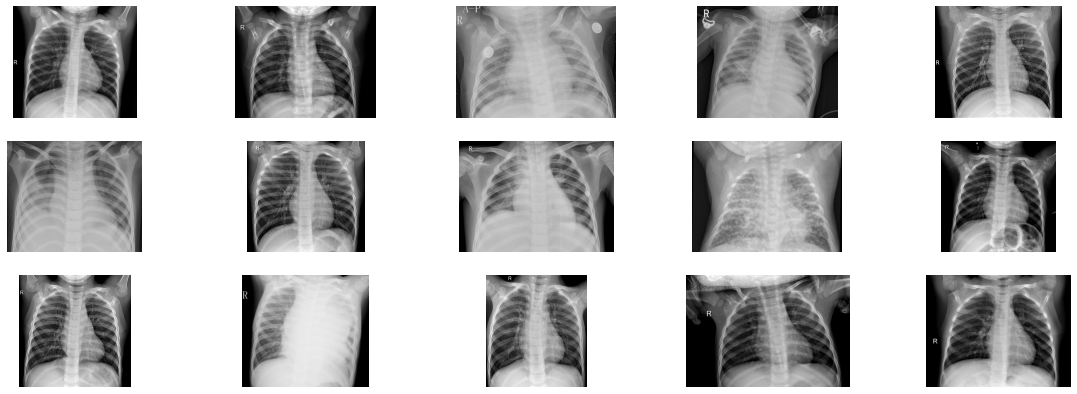

In [14]:
# plotando as imagens
plt.figure(figsize=(20,7))

for i in range(num_images):
    plt.subplot(3,5, 1+i)
    plt.axis('off')
    plt.imshow(images[i])

plt.show();

In [15]:
# instanciando o caminho do diretório/pasta das imagens de treino
train_filepath = os.listdir('raio-x-torax/treino')

In [16]:
# criando uma lista para salvar as informações
categories = []

# realizando um laço de repetição e salvando na lista as informações
for f_name in train_filepath:
    category = f_name.split('.')[0]
    
    if category == 'pneumonia':
        categories.append(1)
    else:
        categories.append(0)

Instalando a biblioteca `pandas`.

In [17]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [18]:
# importando biblioteca
import pandas as pd    # para manipulação e análise de dados

In [19]:
# versão atual da biblioteca
print(pd.__version__)

1.4.1


In [20]:
# instanciando um dataframe com as informações em:
# 'filename': train_filepath
# 'category': categories

# utilizando o formato de dicionário para criar o dataframe
df = pd.DataFrame({
    'filename': train_filepath,
    'category': categories
    })

# visualizando as 15 primeiras observações presentes no dataframe criado
df.head(15)

,filename,category
0,normal.7.jpeg,0
1,normal.47.jpeg,0
2,pneumonia.11.jpeg,1
3,pneumonia.19.jpeg,1
4,normal.23.jpeg,0
5,pneumonia.45.jpeg,1
6,normal.14.jpeg,0
7,pneumonia.38.jpeg,1
8,pneumonia.9.jpeg,1
9,normal.35.jpeg,0


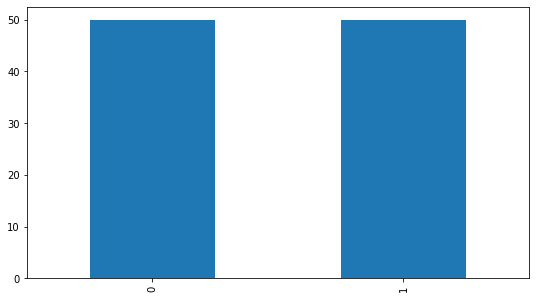

In [21]:
# plotando gráfico de barras das instâncias presentes em cada classe
df['category'].value_counts().plot.bar(figsize=(9,5));

In [22]:
# visualizando a quantidade de observações e a frequência em cada classe
print(
    df['category'].value_counts(),
    round(df['category'].value_counts(normalize=True) * 100, 2),
    sep = '\n\n'
)

0    50
1    50
Name: category, dtype: int64

0    50.0
1    50.0
Name: category, dtype: float64


Instalando a biblioteca `tensorflow`.

In [23]:
pip install tensorflow==2.2

     |████████████████████████████████| 516.3 MB 408 bytes/s  0:00:017   |███▋                            | 58.3 MB 2.9 MB/s eta 0:02:39
     |████████████████████████████████| 3.0 MB 14 kB/s  eta 0:00:01
  Using cached tensorflow_estimator-2.2.0-py2.py3-none-any.whl (454 kB)
     |████████████████████████████████| 26.0 MB 89 kB/s  eta 0:00:01
     |████████████████████████████████| 152 kB 2.1 MB/s eta 0:00:01
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.0.0
    Uninstalling cachetools-5.0.0:
      Successfully uninstalled cachetools-5.0.0
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.6.0
    Uninstalling google-auth-2.6.0:
      Successfully uninstalled google-auth-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow-estimator
    Found existing installati

In [24]:
# importando a biblioteca
import tensorflow as tf

# versão atual da biblioteca
print(tf.__version__)

2.2.0


Instalando a biblioteca `keras`.

In [25]:
# pip install keras

In [27]:
# # importando a biblioteca
# import keras

# # versão atual da biblioteca
# print(keras.__version__)

In [ ]:
# pip install google

In [ ]:
# pip install protobuf

In [28]:
# importando as funções necessárias para construção do modelo de RNA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
                                    Dropout, Flatten, Dense,\
                                    Activation, BatchNormalization

In [29]:
# instanciando as propriedades das imagens
image_widht = 128                           # largura da imagem
image_height = 128                          # altura da imagem
image_size = (image_widht, image_height)    # tamanho da imagem
image_channels = 3                          # quantidade de canais das cores (RGB)

In [30]:
# instanciando o modelo de rede neural artificial
model = Sequential()

# definindo as camadas da RNA
model.add(Conv2D(32, (3,3), activation='relu', 
                input_shape=(image_widht, image_height, image_channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [31]:
# compilando o modelo e definindo a função de perda, otimizador e a métrica
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [32]:
# visualizando o sumário geral do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [33]:
# importando as funções de parada e redução da taxa de aprendizagem
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [34]:
# instanciando a função de parada
early_stop = EarlyStopping(patience=50)

# instanciando a redução da taxa de aprendizagem
# métricas que podem ser utilizadas: loss,accuracy,val_loss,val_accuracy e lr
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                                     patience=2, verbose=1, 
                                                     factor=0.5, lr=0.1e-4) # 0.00001 = 0.1e-4

# instanciando o "callbacks" com os obejtos instanciados acima
callbacks=[early_stop, learning_rate_reduction]

In [35]:
# transformando as instâncias da variável alvo de numérico para categórico
df['category'] = df['category'].replace({0: 'normal', 1: 'pneumonia'})

In [36]:
# visualizando as instâncias únicas presentes na variável alvo
df['category'].unique()

array(['normal', 'pneumonia'], dtype=object)

Instalando a biblioteca `sklearn`.

In [ ]:
# pip install sklearn

In [37]:
# importando a biblioteca
import sklearn

# versão atual da biblioteca
print(sklearn.__version__)

1.0.2


In [38]:
# função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split

In [39]:
# instanciando os dados de treino e validação
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

In [40]:
# resetando os índices dos conjuntos de dados do treino e validação
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [41]:
# instanciando a quantidade de instâncias nos conjuntos de dados de treino e validação
# total_train = train_df.shape[0]
# total_validate = validate_df.shape[0]
# batch_size = 10

# total_train, total_validate, batch_size

In [42]:
# instanciando a quantidade de observações nos conjuntos de dados de treino e validação
total_train = len(train_df)
total_validate = len(validate_df)
batch_size = 10

# visualizando a quantidade de observações nos objetos
total_train, total_validate, batch_size

(80, 20, 10)

In [43]:
# importando as funções para RNA (rede neural artificial)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import to_categorical

In [44]:
# definindo o gerador de treino
train_datagenerator = ImageDataGenerator(
    rotation_range=15,
    rescale=1.0 / 255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# visualizando o endereço de memória do objeto
train_datagenerator

In [45]:
# instanciando os dados do gerador de treino
train_generator = train_datagenerator.flow_from_dataframe(
    train_df,
    'raio-x-torax/treino',
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
train_generator

Found 80 validated image filenames belonging to 2 classes.


In [46]:
# definindo o gerador de validação
validation_datagenerator = ImageDataGenerator(rescale=1.0 / 255)
validation_datagenerator # visualizando o endereço de memória do objeto

In [47]:
# definindo os dados do gerador de validação
validation_generator = validation_datagenerator.flow_from_dataframe(
    validate_df,
    'raio-x-torax/treino/',
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_model='categorical',
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
validation_generator

Found 20 validated image filenames belonging to 2 classes.


In [48]:
# definindo o gerador de teste
test_datagenerator = ImageDataGenerator(
    rotation_range=15,
    rescale=1.0 / 255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# visualizando o endereço de memória do objeto
test_datagenerator

Instalando a biblioteca `scipy`.

In [ ]:
# pip install scipy --upgrade

In [ ]:
# !python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose

In [ ]:
# !sudo apt-get install python-numpy python-scipy python-matplotlib ipython ipython-notebook python-pandas python-sympy python-nose

In [49]:
# importando a biblioteca
import scipy

# versão atual da biblioteca
print(scipy.__version__)

1.4.1


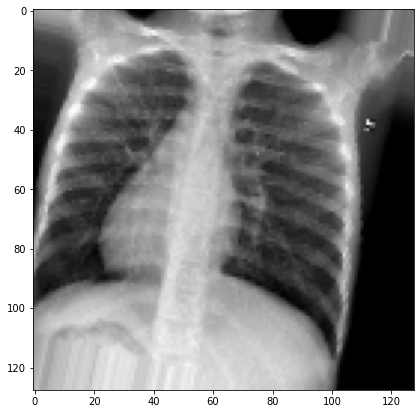

In [50]:
# plotando uma imagem do conjunto de dados de treino
X, y = train_generator.next()
plt.figure(figsize=(9,7))

for i in range(0,1):
    random_image = X[i]
    plt.imshow(random_image)
    plt.show();

In [51]:
# definindo o número de épocas de treinamento
epochs = 500

# realizando o treinamento do modelo
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data= validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks=callbacks
)

Epoch 1/500
8/8 [==============================] - 10s 1s/step - loss: 0.4764 - accuracy: 0.8625 - val_loss: 3.2976 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 2/500
8/8 [==============================] - 4s 503ms/step - loss: 0.2291 - accuracy: 0.9625 - val_loss: 6.3745 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 3/500
8/8 [==============================] - ETA: 0s - loss: 0.0305 - accuracy: 0.9875
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
8/8 [==============================] - 3s 394ms/step - loss: 0.0305 - accuracy: 0.9875 - val_loss: 7.7226 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 4/500
8/8 [==============================] - 3s 384ms/step - loss: 0.2345 - accuracy: 0.9500 - val_loss: 8.6768 - val_accuracy: 0.3500 - lr: 5.0000e-04
Epoch 5/500
8/8 [==============================] - ETA: 0s - loss: 0.1896 - accuracy: 0.9625
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
8/8 [==============================] - 3s 393ms/

Epoch 36/500
8/8 [==============================] - 3s 394ms/step - loss: 0.0483 - accuracy: 0.9750 - val_loss: 16.7723 - val_accuracy: 0.3500 - lr: 7.6294e-09
Epoch 37/500
8/8 [==============================] - ETA: 0s - loss: 0.0540 - accuracy: 0.9750
Epoch 00037: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
8/8 [==============================] - 3s 395ms/step - loss: 0.0540 - accuracy: 0.9750 - val_loss: 15.6365 - val_accuracy: 0.3500 - lr: 7.6294e-09
Epoch 38/500
8/8 [==============================] - 3s 388ms/step - loss: 0.0284 - accuracy: 0.9875 - val_loss: 14.4930 - val_accuracy: 0.4000 - lr: 3.8147e-09
Epoch 39/500
8/8 [==============================] - 3s 385ms/step - loss: 0.1030 - accuracy: 0.9625 - val_loss: 13.5833 - val_accuracy: 0.4000 - lr: 3.8147e-09
Epoch 40/500
8/8 [==============================] - ETA: 0s - loss: 0.0737 - accuracy: 0.9750
Epoch 00040: ReduceLROnPlateau reducing learning rate to 1.907348723406699e-09.
8/8 [====================

Se necessário instalar as bibliotecas descomente os códigos abaixos.

In [52]:
# pip install h5py --upgrade 

In [53]:
# pip install h5 --upgrade

In [54]:
# bibliotecas que podemos usar para salvar o modelo
import h5py
import h5

In [55]:
# versão atual da biblioteca
print(h5py.__version__)
print(h5.__version__)

2.10.0
0.5.2


In [56]:
# realizando teste de funcionalidade da biblioteca
# 0: não
# 1: sim
h5py.run_tests()

Tests require pytest, pytest not installed


1

Para esse caso, irei utilizar a biblioteca `h5` para salvar o modelo.

In [57]:
# salvando o modelo
# model.save('model_deteccaoPneumoniaRaioX.h5py')
model.save('model_deteccaoPneumoniaRaioX.h5')
model # visualizando o endereço de memória do objeto

In [58]:
# instanciando os dados de teste
test_filepath = os.listdir('raio-x-torax/teste')

In [59]:
# instanciando um dataframe com os dados de teste
test_df = pd.DataFrame(
    {'filename': test_filepath}
)

# visualizando o dataframe criado
test_df

,filename
0,7.jpeg
1,36.jpeg
2,4.jpeg
3,16.jpeg
4,8.jpeg
5,45.jpeg
6,23.jpeg
7,21.jpeg
8,9.jpeg
9,15.jpeg


In [60]:
# instanciando os dados do gerador de teste
test_generator = train_datagenerator.flow_from_dataframe(
    test_df,
    'raio-x-torax/teste',
    x_col='filename',
    y_col=None,
    target_size=image_size,
    class_mode=None,
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
test_generator

Found 50 validated image filenames.


In [61]:
# definindo o número de amostras
nb_samples = test_df.shape[0]
nb_samples # visualizando a quantidade de amostras

50

In [62]:
# realizando as predições com o modelo
predict = model.predict(test_generator, steps=np.ceil(nb_samples / batch_size))
predict # visualizando as predições

array([[1.8382074e-31, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [9.9550253e-01, 4.4975001e-03],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [6.6657302e-09, 1.0000000e+00],
       [7.0637207e-10, 1.0000000e+00],
       [2.4383216e-06, 9.9999762e-01],
       [2.3258462e-26, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [5.5003813e-10, 1.0000000e+00],
       [7.4603774e-02, 9.2539626e-01],
       [9.9999869e-01, 1.3343191e-06],
       [0.0000000e+00, 1.0000000e+00],
       [4.8138446e-13, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [9.9999988e-01, 1.2670962e-07],
       [9.9405443e-06, 9.9999011e-01],
       [1.1657000e-01, 8.8343000e-01],
       [5.3503618e-11, 1.0000000e+00],
       [4.0998232e-01, 5.9001768e-01],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 4.5373476e-11],
       [0.0000000e+00, 1.0000000e+00],
       [2.0277712e-02, 9.

In [63]:
# realizando a conversão dos rótulos (labels) de numérico para categórico
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((values, keys) for keys, values in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace(
    {'pneumonia': 1, 'normal': 0}
)

# visualizando o dataframe criado
test_df

,filename,category
0,7.jpeg,1
1,36.jpeg,1
2,4.jpeg,0
3,16.jpeg,1
4,8.jpeg,1
5,45.jpeg,1
6,23.jpeg,1
7,21.jpeg,1
8,9.jpeg,1
9,15.jpeg,1


In [64]:
# instanciando 18 imagens da dataframe "test_df"
# sample_test = test_df.head(18)
sample_test = test_df.sample(18)

# resetando os índices
sample_test = sample_test.reset_index(drop=True)
sample_test # visualizando os dados das amostras selecionadas

,filename,category
0,3.jpeg,1
1,49.jpeg,1
2,37.jpeg,1
3,4.jpeg,0
4,8.jpeg,1
5,13.jpeg,0
6,50.jpeg,1
7,19.jpeg,1
8,32.jpeg,1
9,27.jpeg,1


In [65]:
# importando a função para leitura de imagem
from tensorflow.keras.preprocessing.image import load_img

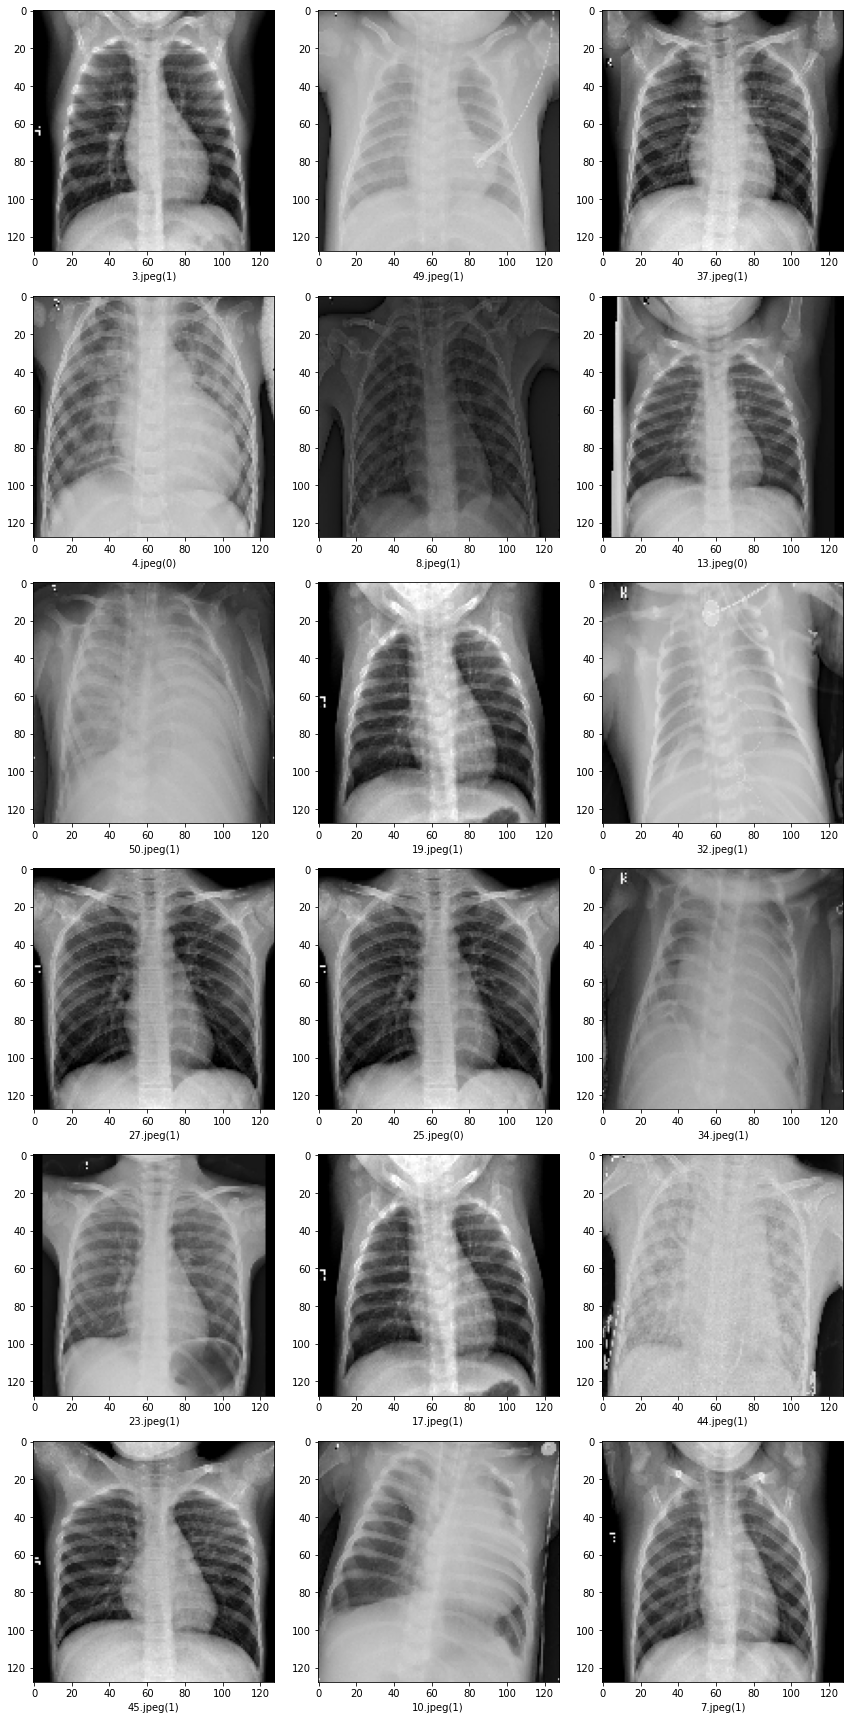

In [66]:
# plotando as 18 imagens da amostra
plt.figure(figsize=(12,24))

for index, row in sample_test.iterrows():
    filename=row['filename']
    category=row['category']
    
    img = load_img('raio-x-torax/teste/' + filename, target_size=image_size)
    
    plt.subplot(6,3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
    
plt.tight_layout()
plt.show();

In [67]:
# importando as bibliotecas e as funções
import numpy as np
import cv2
import tensorflow as tf

from tensorflow import keras
from PIL import Image

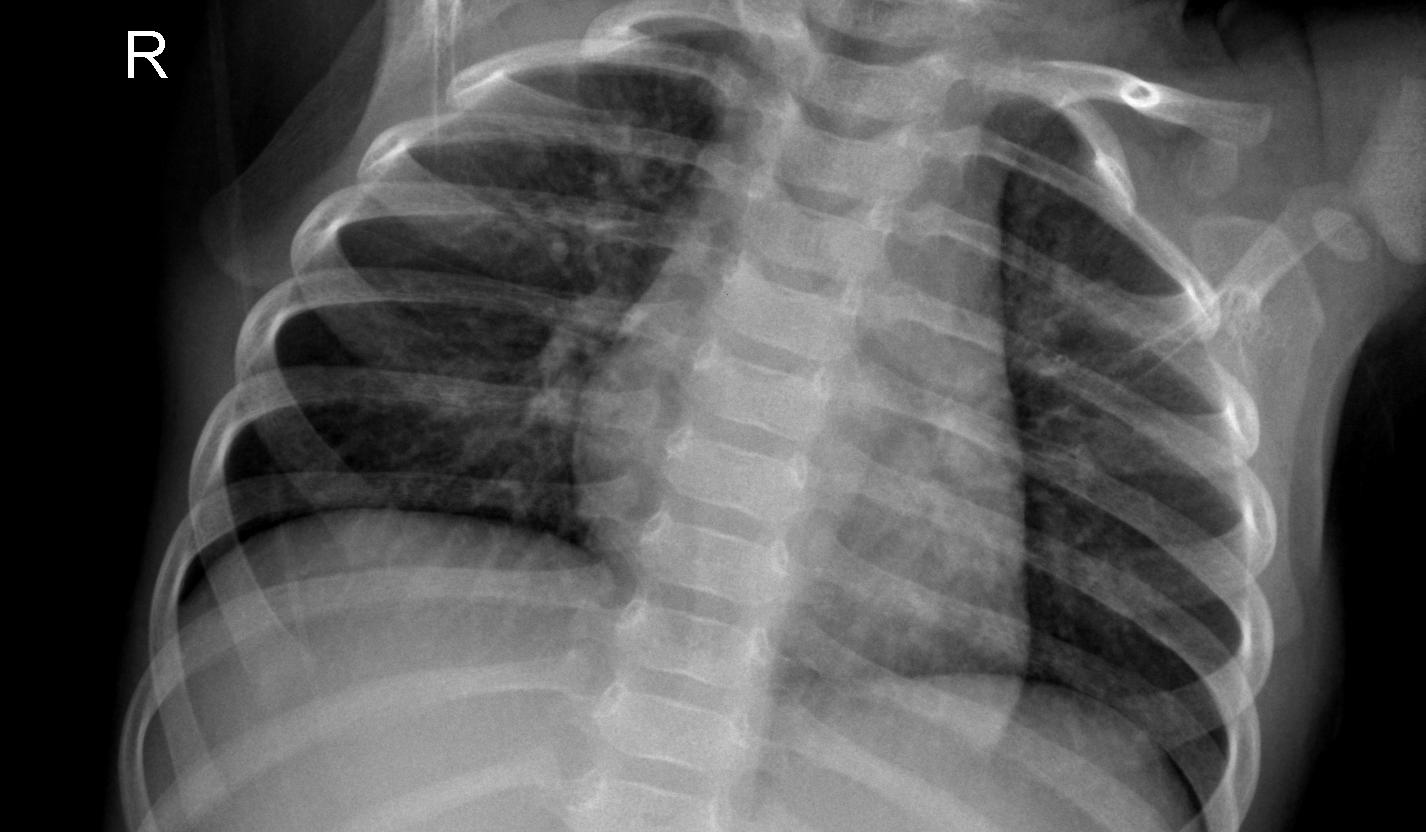

In [68]:
# instanciando uma imagem
i = Image.open('raio-x-torax/teste/11.jpeg')

# visualizando a imagem
i

In [69]:
# redimensionado a imagem
img = i.resize(image_size)
# item = (np.random.standard_normal([128,128,3]) * 255).astype(np.uint8)
img = (np.random.standard_normal([128,128,3]) * 255)
img = np.expand_dims(img, axis=0)
img = np.array(img)
img = img / 255

# realizando a predição da imagem com o modelo
pred_img = model.predict([img])[0]
pred_img # visualizando o resultado da predição

array([0.00660672, 0.99339324], dtype=float32)

Diagnóstico indicado: RX pneumonia


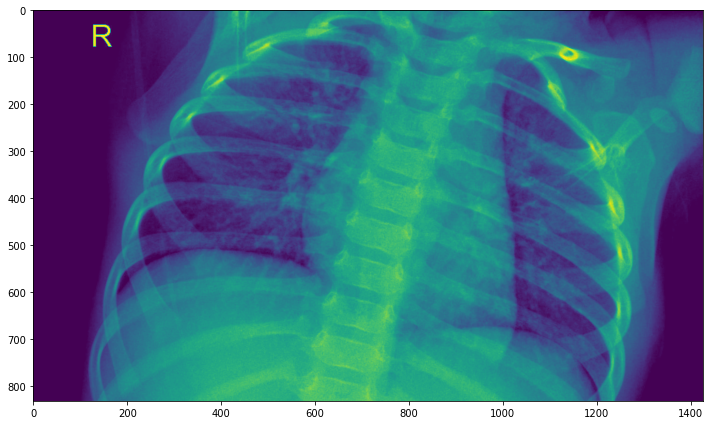

In [70]:
# plotando a imagem e seu dignóstico
if pred_img[0] > pred_img[1]:
    print('Diagnóstico indicado: RX normal')
else:
    print('Diagnóstico indicado: RX pneumonia')

plt.figure(figsize=(12,24))
plt.imshow(i)
plt.show()

In [91]:
# importando as bibliotecas e as funções
import numpy as np
import os
import tkinter as tk

from tkinter import *
from tkinter import filedialog
from PIL import ImageTk, Image
from tensorflow.keras.models import load_model

In [92]:
# teste da biblioteca
# import tkinter
# tkinter._test()

In [93]:
# carregando o modelo no objeto "model"
model = load_model('model_deteccaoPneumoniaRaioX.h5')
model   # visualizando o endereço de memória do objeto

In [94]:
# # carregando o modelo no objeto "model"
# model = load_model('model_deteccaoPneumoniaRaioX.h5py')
# model   # visualizando o endereço de memória do objeto

In [95]:
# iniciando o ambiente GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Classificação para raio-x de tórax')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))

sign_image = Label(top)

In [96]:
# função para classificação da imagem
def classify(file_path):
    global label_packed
    
    image = Image.open(file_path)
    image = (np.random.standard_normal([128, 128, 3]) * 255)
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    image = image / 255
    
    pred = model.predict([image])[0]
    basename = os.path.basename(file_path)
    name = int(basename.rsplit('.', 1)[0]) 
    
    if pred[0] > pred[1]:
        sign ='Diagnóstico indicado: RX normal'
    else:
        sign = 'Diagnóstico indicado: RX pneumonia'
    print(sign)
    
    label.configure(foreground='#011638', text=f'{sign} {str(max(pred * 100))} {str("%")}')  

In [97]:
# função para exibição da janela
def show_classify_button(file_path):
    classify_b = Button(top, text='Classificar imagem', command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

In [98]:
# função para realizar o carregamento da imagem
def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))
        
        im = ImageTk.PhotoImage(uploaded)
        
        sign_image.configure(image=im)
        sign_image.image = im
        
        label.configure(text='')
        
        show_classify_button(file_path)
    
    except:
        pass

In [99]:
# gerando a janela para carregamento da imagem
upload = Button(top, text='Upload da imagem', command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white',font=('arial', 10, 'bold'))
upload.pack(side=BOTTOM, pady=50)

sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)

heading = Label(top, text='Classificação para raio-x de tórax', pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()

Diagnóstico indicado: RX pneumonia
Diagnóstico indicado: RX pneumonia
Diagnóstico indicado: RX pneumonia
Diagnóstico indicado: RX pneumonia
Diagnóstico indicado: RX pneumonia


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/fgalvao77/anaconda3/envs/r_env/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-97-b3f8cee0e96f>", line 3, in <lambda>
    classify_b = Button(top, text='Classificar imagem', command=lambda: classify(file_path), padx=10, pady=5)
  File "<ipython-input-96-15f255dcf43f>", line 13, in classify
    name = int(basename.rsplit('.', 1)[0])
ValueError: invalid literal for int() with base 10: 'normal.1'


Diagnóstico indicado: RX pneumonia


In [ ]:
# def classify(file_path):
#     global label_packed
    
#     image = Image.open(file_path)
#     image = (np.random.standard_normal([128,1128,3]) * 255)
#     image = np.expand_dims(image, axis=0)
#     image = np.array(image)
#     image = image / 255
    
#     pred = model.predict([image])[0]
#     basename = os.path.basename(file_path)
#     name = int(basename.rsplit('.', 1)[0])
    
#     if pred[0] > pred[1]:
#         sign = 'Diagnóstico indicado: RX normal'
#     else:
#         sign = 'Diagnóstico indicado: RX pneumonia'
        
#     print(sign)
        
#     label.configure(foreground='#011638', text=f'{sign} {str(max(pred * 100))} {str("%")}') 
    
# def show_classify_button(file_path):
#     classify_b = Button(top, text='Classificar imagem', command=lambda: classify(file_path), padx=10, pady=5)
#     classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
#     classify_b.place(relx=0.79, rely=0.46)
    
# def upload_image():
#     try:
#         file_path = filedialog.askoponfilename()
#         uploaded = Image.open(file_path)
#         uploaded.thumbnai(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))
        
#         img = ImageTk.PhotoImage(uploaded)
#         sign_image.configue(image=img)
#         sign_image.image = img
#         label.configue(text='')
#         show_classifify_button(file_path)
        
#     except:
#         pass
    
# upload = Button(top,text='Upload da imagem',command=upload_image,padx=10,pady=5)
# upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
# upload.pack(side=BOTTOM,pady=50)
# sign_image.pack(side=BOTTOM,expand=True)
# label.pack(side=BOTTOM,expand=True)
# heading = Label(top, text='Classificação para raio-x de tórax',pady=20, font=('arial',20,'bold'))
# heading.configure(background='#CDCDCD',foreground='#364156')
# heading.pack()
# top.mainloop()